## **MNIST Digit Recognition using CNN**

In [144]:
# data processing
import numpy as np
from keras.utils.np_utils import to_categorical

# for building CNN
import keras
from keras.datasets import mnist

# for model building
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# for visualization of CNN network

from keras.utils.vis_utils import model_to_dot
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
%matplotlib inline



## Data loading and processing

In [145]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

In [147]:
first_image = X_train[0, :, :]

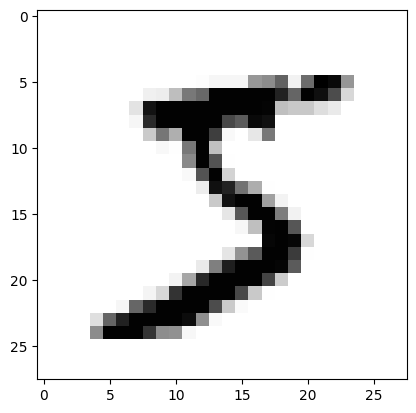

In [148]:
# to interpret the value as a 28x28 image, we need to reshape
# theh numpy array, which is one dimensional:
plt.imshow(first_image,cmap = plt.cm.Greys);


In [149]:
classes = len(np.unique(y_train))
classes

10

In [151]:
# 60k training 28x28 (pixel) images
X_train.shape

(60000, 28, 28)

In [152]:
#10k test 28x28 pixel images
X_test.shape

(10000, 28, 28)

Next, we need to reshape our dataset inputs (X_train and X_test) to the shape our model expects when we train the model.
The first number is the number of images (60000 for X_train and 10000 for X_train) Then comes the shape of each image (28x28)
The last number is 1, which signifies the images are greyscale

In [153]:
# training and test datasets are integers, ranging 0 to 255
# we reshape the training and test data sets to be a 4D tensor
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')
input_shape =(28,28,1)

In [154]:
# normalize - sclees the training and test data to range between 0 and 1
max_value = X_train.max()
X_train /= max_value
X_test /= max_value


In [155]:
# training and test labels are integers from 0 to 9 indicating the class label
(y_train,y_test)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

We need to 'one hot encoder' our target variable. This means that a column will be created for each output category and binary variable is inputted for each category, for example we saw the first image in the dataset is 5  

In [156]:
# we convert the class labels to binary class metrices
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test,classes)

In [157]:
(y_train,y_test)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

# Convolutional Neural Net (ConvNet)
- use add() function to add layers to our model
- our first layer is Conv2D layer,this deals with input images, these are 2D matrices
- 32 in first conv2D layer and 64 in second Conv2D layer are number of nodes/neurons in each layer
- this can be adjusted depending on size of dataset, 32 or 64 will work
- first layer is an input shape 
-  kernel size is size of filter matrix for our convolution, so kernel size of 3 means, matrix filter of 3x3 
- between convo and dense layer there is Flatten layer 


In [160]:
#initializing keras Sequential model
model = Sequential()

input_shape = (28,28,1)

model.add(Conv2D(filters  =32,
                kernel_size = (3,3),
                strides = (1,1),
                activation = 'relu',
                input_shape = input_shape))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,
                kernel_size = (3,3),
                activation= 'relu'))

# additional layer
model.add(Conv2D(filters = 128,
                kernel_size = (4,4),
                activation= 'relu'))
# additional layer
model.add(MaxPooling2D(pool_size=(2,2)))


# for regularization
model.add(Dropout(rate = 0.25,seed = 500))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(units= 128,activation='relu'))

# for regularization
model.add(Dropout(rate = 0.5,seed=500))
model.add(Dense(units = classes,activation = 'softmax'))

# dropout -rate --> float-0 and 1
# fraction of the input units to drop



**no. of parameters in Conv2D**
(((w*h*d)+1)*k)
here w is width of the filter
h - height of the filter
d - depth of the filter
1 is bias for 1 filter
k is number of filters i current layer


number of parameters in dense layer
total params = weight+biases = (ncxnp)+(nc*1)
nc = current layer neurons
np = previous layer neurons


In [161]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 128)         131200    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 4, 4, 128)        

In [165]:
# getting error here
# SVG(model_to_dot(model,show_shapes=True, dpi=70).create(prog='dot', format='svg'))

## T**rain classifier**


- we need to compile our model, it will require 3 parameters, optimizer, loss and metrics
- 'adam' as optimizer and 'categorical_crossentropy as loss function

In [166]:
# using 'adam' optimizer here
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

Now we will train our model. To train we use fit() function

In [167]:
model.fit( X_train,
          y_train,
          batch_size = 128,
          epochs  =3,
          verbose =1)

Epoch 1/3
469/469 [==============================] - 50s 104ms/step - loss: 0.3082 - accuracy: 0.9032
Epoch 2/3
469/469 [==============================] - 49s 103ms/step - loss: 0.0895 - accuracy: 0.9736
Epoch 3/3
469/469 [==============================] - 49s 104ms/step - loss: 0.0668 - accuracy: 0.9802


## **Model Evaluation**
- for our validation data, we will use the test set provided to us in our dataset, which we have split into X_test and y_test

In [ ]:
# here acuuracy is almost ~99% , Returns loss and Accuracy
model.evaluate(X_test,y_test)

In [ ]:
#predicting a couple of held-out images
first_test_image = X_test[0,:]
plt.imshow(first_test_image.reshape(28,28),cmap = plt.cm.Greys);

In [ ]:
# this is plot images with numerial data from numpy zip file 
second_test_image = X_test[19,:]
plt.imshow(second_test_image.reshape(28,28),cmap = plt.cm.Greys);

In [ ]:
# this will predict the number in the integer format as per outr input
# if our model uses softmax as the last nn layers
np.argmax(model.predict(X_test[[19],:])).astype('int32')

In [ ]:
np.argmax(model.predict(X_test[[10],:])).astype('int32')

In [140]:
np.argmax(model.predict(X_test[[20],:])).astype('int32')

1/1 [==============================] - 0s 108ms/step


2